# Homework

Remember to load the necessary libraries. 

In [86]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(9, 5)})

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

The following dataset is a [well known dataset](https://www.kaggle.com/c/titanic) containing data on the passengers of the Titanic. Check out [this Kaggle page](https://www.kaggle.com/competitions/titanic/data) for more information on the variables contained in the dataset. Conveniently enough, a copy of this dataset can be loaded via the `seaborn` library.

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


> Your task is to create a Logistic regression model that predicts which passengers survived the Titanic shipwreck.

The guidelines below will help you remember the necessary steps to reach your goal:

1. familiarise yourself with the data and explore both numeric and categorical variables that are available;
2. look at the predictors that are available and decide which you want to include in the model (*hint: categorical variables need to be converted to dummies first*); 
3. remember to check for the possibility of multicollinearity between the regressors (*hint: `.corr()` is your friend*);
4. once you're happy with your data, create a predictors matrix $X$ and a responce vector $y$ 
5. remember to split the data between training and test sets
6. use `statsmodels` or the `sklearn` library to fit a Logistic regression model to the training data; 
7. check out the regressioin coefficients (optional to print them to screen); 
8. take the model you just trained and use it on the test set (`X_test`) to produce a vector of predictions `y_pred`; 
9. check the performance of the model using an appropriate evaluation metric.

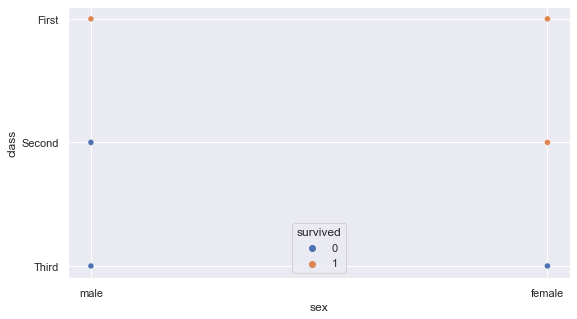

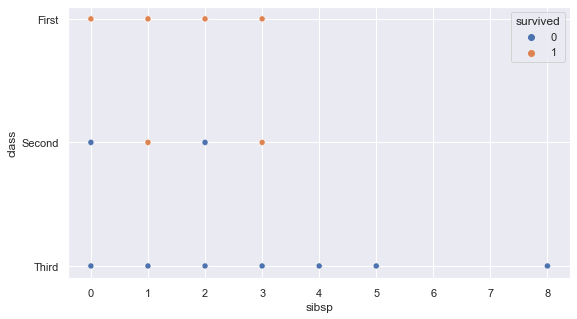

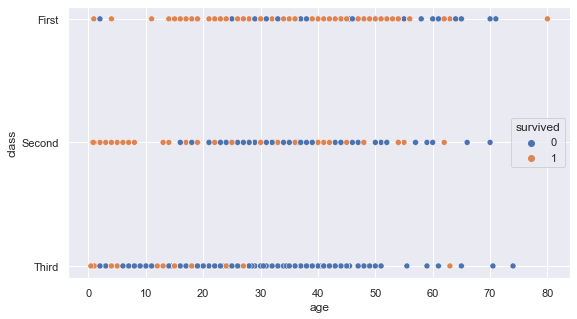

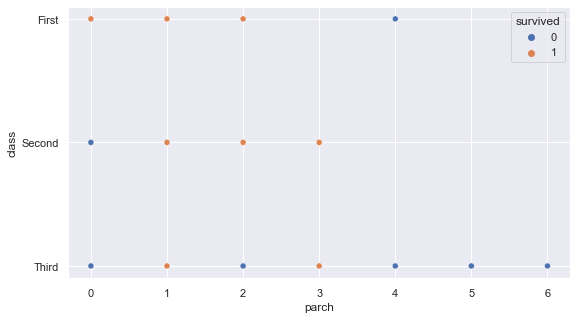

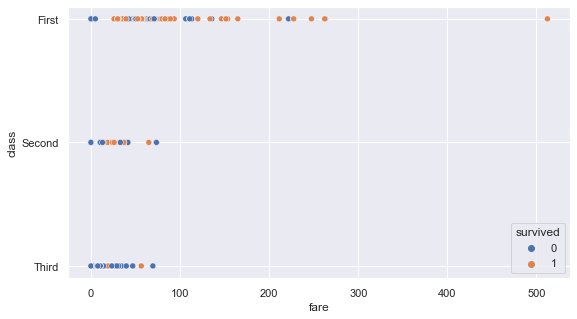

In [35]:
for feature in ['sex','sibsp','age','parch', 'fare']: 
    sns.scatterplot(x=feature, y='class', hue='survived', data = df)
    plt.show()

In [36]:
df['sexboo'] = [1 if el == 'male' else 0 for el in df['sex']]

In [75]:
df['AGE']= df['age'].fillna(method='bfill').astype('int64')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  sexboo       891 non-null    int64   
 16  AGE          891 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(6), object(5)
memory usage: 94

In [77]:
df2 = pd.get_dummies(df, columns=["class"])
#df2 = df2[['survived', 'sex', 'age','sibsp','parch', 'fare', 'alive','First','Second','Third']]
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,sexboo,AGE,class_First,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,1,22,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,0,38,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,0,26,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,0,35,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,1,35,0,0,1


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      891 non-null    int64   
 1   pclass        891 non-null    int64   
 2   sex           891 non-null    object  
 3   age           714 non-null    float64 
 4   sibsp         891 non-null    int64   
 5   parch         891 non-null    int64   
 6   fare          891 non-null    float64 
 7   embarked      889 non-null    object  
 8   who           891 non-null    object  
 9   adult_male    891 non-null    bool    
 10  deck          203 non-null    category
 11  embark_town   889 non-null    object  
 12  alive         891 non-null    object  
 13  alone         891 non-null    bool    
 14  sexboo        891 non-null    int64   
 15  AGE           891 non-null    int64   
 16  class_First   891 non-null    uint8   
 17  class_Second  891 non-null    uint8   
 18  class_Thir

In [89]:
df2[['sexboo','sibsp','AGE', 'fare']].corr()

,sexboo,sibsp,AGE,fare
sexboo,1.000000,-0.114631,0.060747,-0.182333
sibsp,-0.114631,1.000000,-0.204276,0.159651
AGE,0.060747,-0.204276,1.000000,0.085654
fare,-0.182333,0.159651,0.085654,1.000000


In [90]:
y = df2['survived']
X = df2[['sexboo','sibsp','AGE', 'fare']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train, y_train)

LogisticRegression()

In [92]:
print('Intercept:', log_reg.intercept_)
print('Coefficients:', log_reg.coef_[0])

Intercept: [1.15097655]
Coefficients: [-2.37726027 -0.38910332 -0.01394522  0.0133511 ]


In [93]:
y_pred = log_reg.predict(X_test)

In [94]:
# accuracy of predictions:
np.mean(y_pred==y_test)

0.8022388059701493

In [95]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[136,  21],
       [ 32,  79]])

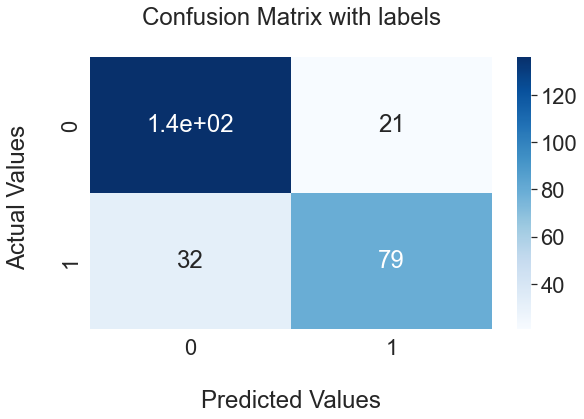

In [96]:
# visualization of the Confusion Matrix
sns.set(font_scale=2)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values \n');

ax.yaxis.set_ticklabels(['0','1'])
ax.xaxis.set_ticklabels(['0','1'])

plt.show()